In [1]:
"""Data inspection."""

'Data inspection.'

In [1]:
import importlib
import os

import matplotlib
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

import analyze
importlib.reload(analyze)
import datasets
importlib.reload(datasets)
import train_utils
importlib.reload(train_utils)
import vis
importlib.reload(vis)

DATA_DIR = '/neuro/'
DATA_TYPE = 'mnist'

IMG_SHAPE = (28, 28)
SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)
TRAIN_DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/%s_%s_%s.npy' % (
        'train', DATA_TYPE, SHAPE_STR))
VAL_DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/%s_%s_%s.npy' % (
        'val', DATA_TYPE, SHAPE_STR))

DATASET_PATH = TRAIN_DATASET_PATH
DATASET = np.load(DATASET_PATH)

OUTPUT = '/scratch/users/nmiolane/imoutput_mnist'
CMAP = 'gray'

Using numpy backend


From: https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf

1. netmats1: Using "full" normalized temporal correlation between every node timeseries
and every other. This is a common approach and is very simple, but it has various
practical and interpretational disadvantages [Smith 2012].
2. netmats2: Using partial temporal correlation between nodes' timeseries. This aims to
estimate direct connection strengths better than achieved by full correlation. To slightly
improve the estimates of partial correlation coefficients, a small amount of L2
regularization is applied (setting rho=0.01 in the Ridge Regression netmats option in
FSLNets) [Smith OHBM 2014, FSLNets]. 

Loading /neuro/train_val_datasets/train_mnist_28x28.npy
Dataset shape: (48000, 1, 28, 28)


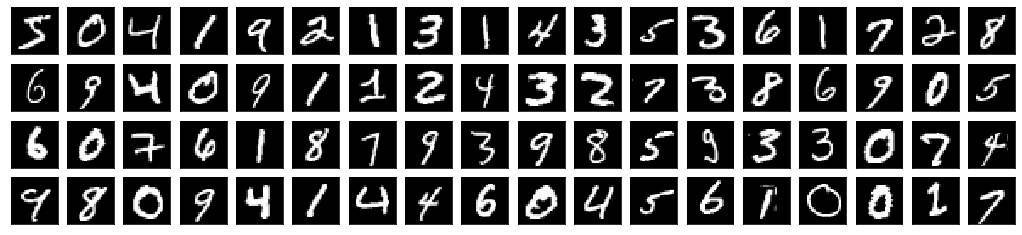

In [53]:
vis.show_data(DATASET_PATH, cmap=CMAP)

In [2]:
ckpt = train_utils.load_checkpoint(OUTPUT)
print(ckpt['nn_architecture'])

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_mnist/train_vae/epoch_14_checkpoint.pth.
{'spd': False, 'data_dim': 784, 'img_shape': (1, 28, 28), 'nn_type': 'conv', 'latent_dim': 10}


Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_mnist/train_vae/epoch_15_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_mnist/train_vae/epoch_15_checkpoint.pth.


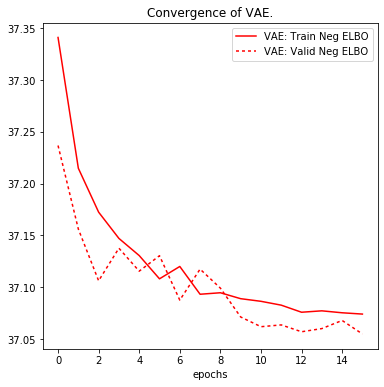

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax = vis.plot_convergence(ax, OUTPUT, algo_name='vae', crit_name='neg_elbo')

Loading /neuro/train_val_datasets/train_mnist_28x28.npy
Dataset shape: (48000, 1, 28, 28)
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_mnist/train_vae/epoch_15_checkpoint.pth.
Loading encoder from network of architecture: conv...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_mnist/train_vae/epoch_15_checkpoint.pth.
Loading decoder from network of architecture: conv...


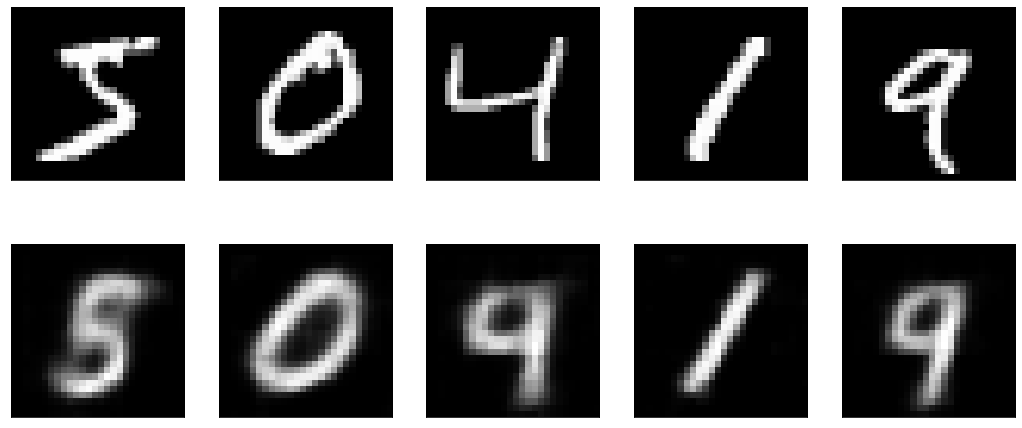

In [4]:
vis.show_img_and_recon(OUTPUT, DATASET_PATH, cmap=CMAP)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_mnist/train_vae/epoch_15_checkpoint.pth.
Loading decoder from network of architecture: conv...


/home/user/miniconda/envs/py36/lib/python3.7/site-packages/torch/tensor.py:339: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


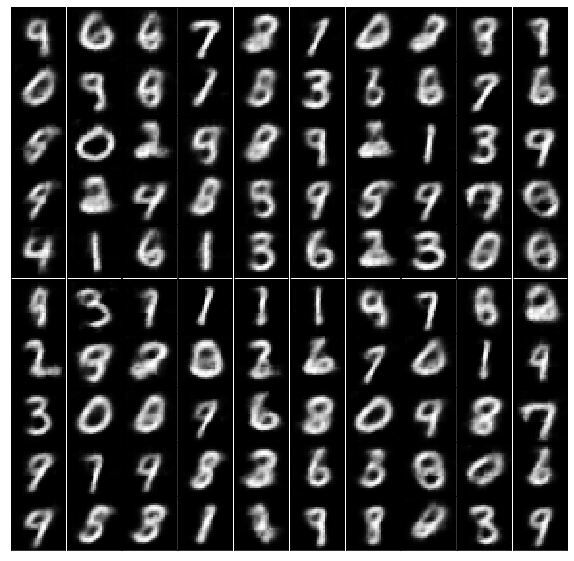

In [5]:
fig = plt.figure(figsize=(10, 10))
outer = gridspec.GridSpec(1, 1, wspace=0.1, hspace=0.1)

for i, algo_name in enumerate(['vae']):
    vis.show_samples_from_prior(
        OUTPUT, fig, outer, i, algo_name=algo_name, cmap=CMAP)
fig.show()

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_24_checkpoint.pth.
Loading encoder from network of architecture: conv...


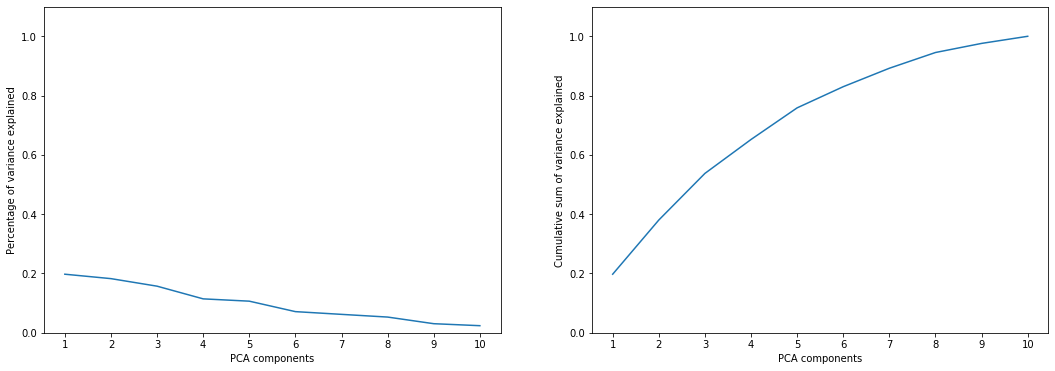

In [69]:
ax = vis.plot_variance_explained(OUTPUT, DATASET_PATH)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_mnist/train_vae/epoch_16_checkpoint.pth.
Loading encoder from network of architecture: conv...


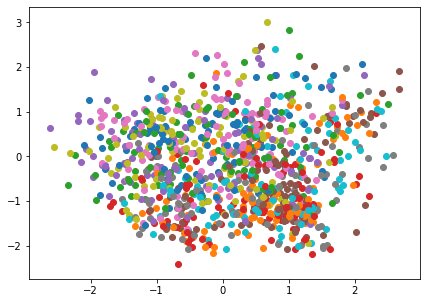

In [7]:
n_pcs = 2

mus = analyze.latent_projection(
    output=OUTPUT, dataset_path=DATASET_PATH)
_, projected_mus = analyze.pca_projection(mus, n_pcs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

for mu in projected_mus[:1000]:
    if n_pcs == 2:
        im = ax.scatter(mu[0], mu[1]) 
    else:
        im = ax.scatter(mu[0], mu[1], mu[2])